# EMNIST 辨識

In [1]:
# Visualization Dependencies
from IPython.display import Image, SVG
import seaborn as sns

# Filepaths, Numpy, Tensorflow
import os
import numpy as np
import tensorflow as tf

# Keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

2024-08-13 21:09:32.190257: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-13 21:09:32.204329: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 21:09:32.216615: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 21:09:32.219986: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-13 21:09:32.232325: I tensorflow/core/platform/cpu_feature_guar

### Import and Shape Data

In [2]:
!poetry add emnist

Using version ^0.0 for emnist

Updating dependencies
Resolving dependencies... (1.0s)

Package operations: 2 installs, 0 updates, 0 removals

  - Installing tqdm (4.66.5): Pending...
  - Installing tqdm (4.66.5): Installing...
  - Installing tqdm (4.66.5)
  - Installing emnist (0.0): Pending...
  - Installing emnist (0.0): Downloading... 0%
  - Installing emnist (0.0): Downloading... 100%
  - Installing emnist (0.0): Installing...
  - Installing emnist (0.0)

Writing lock file


## [EMNIST 說明](https://pypi.org/project/emnist/)
## [資料集 說明](https://www.nist.gov/itl/products-and-services/emnist-dataset)

In [2]:
# pip install emnist
# Import Dataset(s)
from emnist import list_datasets
list_datasets()

BadZipFile: File is not a zip file

In [3]:
# Working with 'letters'
# Import 
from emnist import extract_training_samples
images_train, labels_train = extract_training_samples('letters')
from emnist import extract_test_samples
images_test, labels_test = extract_test_samples('letters')

BadZipFile: File is not a zip file

In [4]:
# Check shape of training and testing data
print(images_train.shape)
print(labels_train.shape)
print(images_test.shape)
print(labels_test.shape)

NameError: name 'images_train' is not defined

In [47]:
import pandas as pd

df = pd.DataFrame({'ascii':labels_train})
df.head()

,ascii
0,23
1,7
2,16
3,15
4,23


In [48]:
df.ascii.value_counts()

23    4800
7     4800
20    4800
3     4800
4     4800
8     4800
1     4800
12    4800
9     4800
25    4800
2     4800
5     4800
19    4800
26    4800
21    4800
18    4800
14    4800
10    4800
24    4800
22    4800
11    4800
13    4800
17    4800
15    4800
16    4800
6     4800
Name: ascii, dtype: int64

In [52]:
df.ascii.unique()

array([23,  7, 16, 15, 17, 13, 11, 22, 24, 10, 14, 18, 21, 26, 19,  5,  2,
       25,  9, 12,  1,  8,  4,  3, 20,  6], dtype=uint8)

In [50]:
df.ascii.nunique()

26

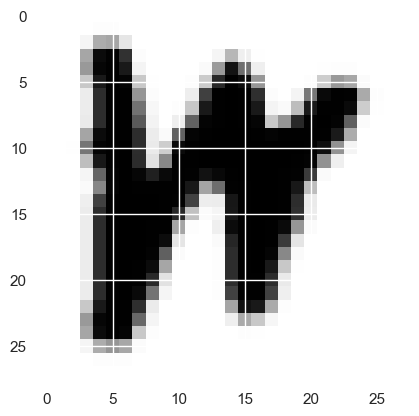

In [54]:
# Plot an image
import matplotlib.pyplot as plt
plt.imshow(images_train[0,:,:], cmap=plt.cm.Greys);

In [55]:
labels_train[0]

23

In [56]:
import pandas as pd

df = pd.read_csv('emnist-letters-mapping.txt', header=None, sep = ' ', index_col=0)
df.columns = ['ascii', 'ascii2']
df['character'] = df['ascii'].apply(lambda x: chr(x))
df

,ascii,ascii2,character
0,,,
1,65,97,A
2,66,98,B
3,67,99,C
4,68,100,D
5,69,101,E
6,70,102,F
7,71,103,G
8,72,104,H
9,73,105,I


## [ASCII Table](https://www.asciitable.com/)
<img src='https://www.asciitable.com/asciifull.gif' />

In [57]:
chr(48)

'0'

In [58]:
labels_train[0], df.iloc[labels_train[0]]

(23,
 ascii         88
 ascii2       120
 character      X
 Name: 24, dtype: object)

In [59]:
# 調整 y class -= 1
labels_train = labels_train - 1
labels_test = labels_test - 1
labels_train[0], df.iloc[labels_train[0]]

(22,
 ascii         87
 ascii2       119
 character      W
 Name: 23, dtype: object)